In [72]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# Might be worth trying to download packages such as Scipy but we will see later on!

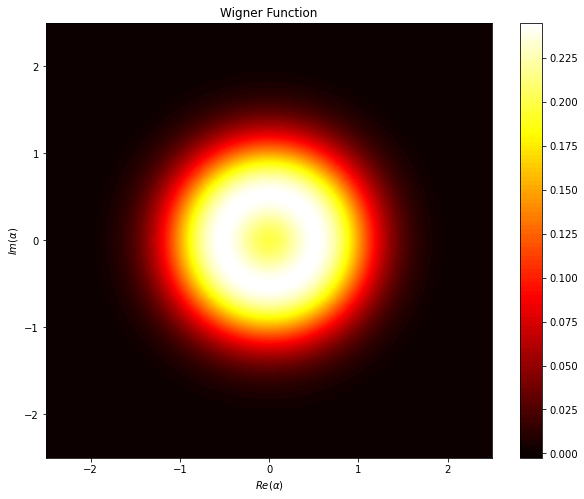

C:\Users\NoahF\AppData\Local\Temp/ipykernel_19572/2611401171.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  moda = W[np.int(P/2)]


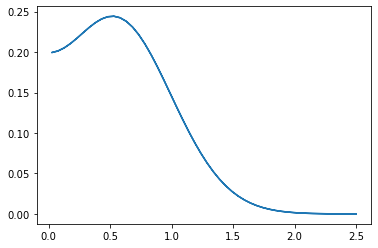

In [4]:
#Vdp Oscillator without an external drive:

N = 50
psi0 = basis(N,0)
a = destroy(N)
H = a.dag() * a # Hamiltonian is just the number operator with no heat bath
# We want to create collapse operators so that mesolve can do the heavy lifting
k1 = 1  # rate at which the coupling occurs 
k2 = 20 * k1
c1 = np.sqrt(2*k1) * a.dag() # square root of rate * how the coupling happens
c2 = np.sqrt(2*k2) * (a**2)
t = np.linspace(0,10,3000)
Collapse = [c1 , c2]

results = mesolve(H,psi0,t,Collapse)
P = 100
x = np.linspace(-2.5,2.5,P)


W = wigner(results.states[2999],x,x,g = np.sqrt(4))
wmap = wigner_cmap(W)                                             #Generate Wigner colormap   
nrm = mpl.colors.Normalize(0, W.max())                             #Normalise colours of Wigner function

fig, axes = plt.subplots(1, 1, figsize=(10,8))
contour = axes.contourf(x, x, W, 100, cmap=cm.hot, norm = nrm)       #Plot the Wigner function
cb = fig.colorbar(contour, ax=axes)                                                 #Show a colourbar
plt.title("Wigner Function")
plt.xlabel(r'$Re (\alpha) $')
plt.ylabel(r'$Im (\alpha) $') 
plt.show()

moda = W[np.int(P/2)]
z= np.abs(x)
plt.plot( z , moda)
# if you see a "ripple in a pond" effect there aren't enough number states
# We had to calibrate our wigner function such that it matches the results of Tony Lee, explaination in Onedrive.

#This is the Quantum Limit for the VDP oscillator as the k2 is much larger than k1.




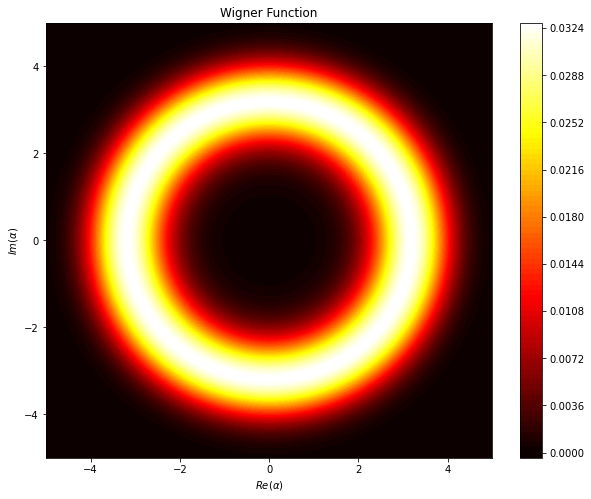

C:\Users\NoahF\AppData\Local\Temp/ipykernel_19572/1683516358.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  moda = (W)[np.int(P/2)]


(0.0, 0.04)

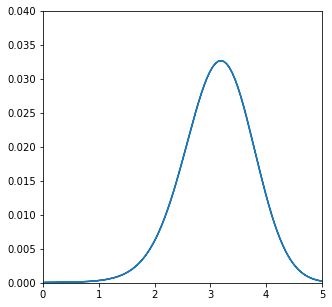

In [80]:
#Vdp Oscillator without an external drive:

N = 50
psi0 = basis(N,0)
a = destroy(N)
H = a.dag() * a # Hamiltonian is just the number operator with no heat bath
# We want to create collapse operators so that mesolve can do the heavy lifting
k1 = 1.0 # rate at which the coupling occurs 
k2 = 0.05 * k1
c1 = np.sqrt(2*k1) * a.dag() # square root of rate * how the coupling happens
c2 = np.sqrt(2*k2) * (a**2)
t = np.linspace(0,10,3000)
Collapse = [c1 , c2]
results = mesolve(H,psi0,t,Collapse)

P = 200
x = np.linspace(-5,5,P)


W = wigner(results.states[2999],x,x,g = np.sqrt(4))
wmap = wigner_cmap(W)                                             #Generate Wigner colormap   
nrm = mpl.colors.Normalize(0, W.max())                             #Normalise colours of Wigner function

fig, axes = plt.subplots(1, 1, figsize=(10,8))
contour = axes.contourf(x, x, W, 100, cmap=cm.hot, norm = nrm)       #Plot the Wigner function
cb = fig.colorbar(contour, ax=axes)                                                 #Show a colourbar
plt.title("Wigner Function")
plt.xlabel(r'$Re (\alpha) $')
plt.ylabel(r'$Im (\alpha) $') 
plt.show()

moda = (W)[np.int(P/2)]
z= np.abs(x)
fig, axes = plt.subplots(1, 1, figsize=(5,5) )

plt.plot( z , moda)
axes.set_xlim(0,5)
axes.set_ylim(0,0.04)

# Needed to include a rescaling s.t our results match Lee's
#This is the classical limit as k1 is much larger than k2



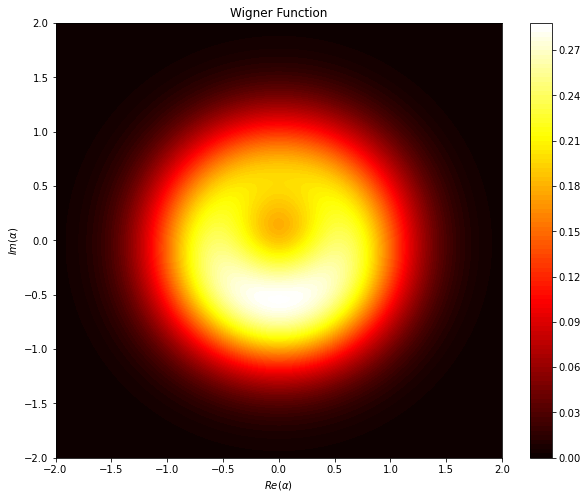

In [79]:
#Vdp Oscillator with external drive: quantum limit

N = 30
psi0 = basis(N,0)
a = destroy(N)
E = k1 # drive strength.... what units are we talking about is something to be concrete on!
D = 0 # detuning 

H = D*(a.dag() * a) + (E/2)*(a + a.dag())


k1 = 1  # rate at which the coupling occurs 
k2 = 20 * k1 
c1 = np.sqrt(2*k1) * a.dag() # square root of rate * how the coupling happens
c2 = np.sqrt(2*k2) * (a**2)
t = np.linspace(0,10,3000) # Sometimes we need to increase the number of timesteps s.t the ODE's are sufficiently continuous.
Collapse = [c1 , c2] #list of collapse operators.

results = mesolve(H,psi0,t,Collapse)

P = 200
x = np.linspace(-2,2,P)
W = wigner(results.states[2999],x,x,g = np.sqrt(4))

xx = x + 1j * x[:, np.newaxis] # a + ib over complex plane
alpha = np.exp(xx)
theta = np.angle(alpha)
r = np.abs(alpha)



wmap = wigner_cmap(W)                                            
nrm = mpl.colors.Normalize(0, W.max())                


fig, axes = plt.subplots(1, 1, figsize=(10,8))
contour = axes.contourf(x, x, W, 100, cmap=cm.hot, norm = nrm)      
cb = fig.colorbar(contour, ax=axes)                           
plt.title("Wigner Function")
plt.xlabel(r'$Re (\alpha) $')
plt.ylabel(r'$Im (\alpha) $')
plt.show()

# Here we see similar results to that of Sadeghpour, that being the radial symmetry is broken in the quantum limit
# when k2 --> infinity we see the quantum behaviour and that the symmetry is lost as the phase is pulled by the drive

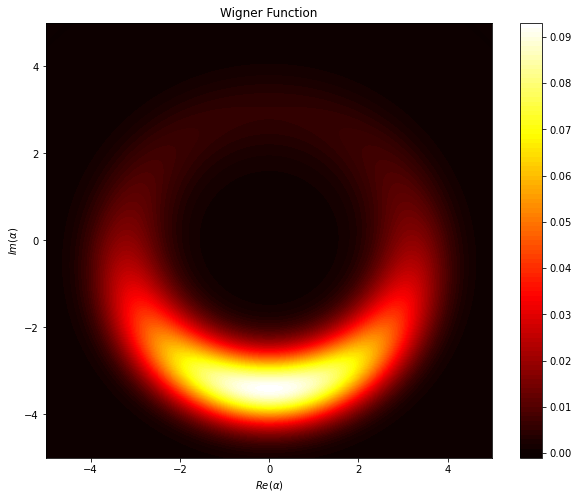

In [77]:
#Vdp Oscillator with external drive: classical limit

N = 50
psi0 = basis(N,0)
a = destroy(N)
E = k1 # drive strength.... what units are we talking about is something to be concrete on!
D = 0 # detuning 

H = D*(a.dag() * a) + (E/2)*(a + a.dag())


k1 = 1  # rate at which the coupling occurs 
k2 = 0.05 * k1 
c1 = np.sqrt(2*k1) * a.dag() # square root of rate * how the coupling happens
c2 = np.sqrt(2*k2) * (a**2)
t = np.linspace(0,10,3000) # Sometimes we need to increase the number of timesteps s.t the ODE's are sufficiently continuous.
Collapse = [c1 , c2] #list of collapse operators.

results = mesolve(H,psi0,t,Collapse)

P = 200
x = np.linspace(-5,5,P)
W = wigner(results.states[2999],x,x,g = np.sqrt(4))


wmap = wigner_cmap(W)                                            
nrm = mpl.colors.Normalize(0, W.max())                


fig, axes = plt.subplots(1, 1, figsize=(10,8))
contour = axes.contourf(x, x, W, 100, cmap=cm.hot, norm = nrm)      
cb = fig.colorbar(contour, ax=axes)                           
plt.title("Wigner Function")
plt.xlabel(r'$Re (\alpha) $')
plt.ylabel(r'$Im (\alpha) $')
plt.show()
